# Background

__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.


## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  

# Analysis
1. It looks like the tweets created on 4/2/2018 are all not that positive.
2. And the tweets from bbc news group have the most negative attributes.
3. The tweets from nytimes have the most positive attributes compared to the others.

In [74]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time


# Initialize Sentiment Analyzer 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [75]:
# Twitter API Keys
consumer_key = 'ULYNrC0gPeFqgmsQTftVHLgn9'
consumer_secret = 'oXSq3nD1Wvjib4QTYed6EmbmG8nIQ16q8ZwGCLqsGXiJepfMYS'
access_token = '974846597581365249-3XiLsYvAZJwq1z9U9fkNIpZXSI9Z96E'
access_token_secret = 'jPdcYhkI7MdeKZYPdDcaLiHrRV51pGUk6bxN0rs37N8m4'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [76]:
# list of users
users = ["nytimes","FoxNews", "BBCWorld","CBSNews","CNN","CBSNews"]

# outputs 100 tweets
tweet_data = {"source": [], 
              "tweet_text": [], 
              "date": [],
              "compound": [], 
              "positive": [], 
              "negative": [], 
              "neutral": []}

# loop through latest 5 pages of twitter
for x in range(5):
    
    # loop through each user
    for user in users: 
        tweets = api.user_timeline(user, page=x)
    
    # loop through the 20 tweets per page and save text info
        for tweet in tweets:
            tweet_data["source"].append(user)
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["date"].append(tweet["created_at"])
        
            #calculate for polarity scores
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
        
            # saves info into lists
            tweet_data["compound"].append(compound)
            tweet_data["positive"].append(pos)
            tweet_data["negative"].append(neg)
            tweet_data["neutral"].append(neu)

In [77]:
tweet_data_df=pd.DataFrame(tweet_data)
tweet_data_df.head()

,compound,date,negative,neutral,positive,source,tweet_text
0,0.0000,Mon Apr 02 16:59:22 +0000 2018,0.000,1.000,0.000,nytimes,President Trump suggested Putin visit the Whit...
1,0.2263,Mon Apr 02 16:48:04 +0000 2018,0.000,0.909,0.091,nytimes,RT @nytpolitics: He's been a Muppet wrangler a...
2,0.0000,Mon Apr 02 16:38:04 +0000 2018,0.108,0.784,0.108,nytimes,As vaping rises at high schools and middle sch...
3,-0.0258,Mon Apr 02 16:28:07 +0000 2018,0.217,0.569,0.214,nytimes,"Last fall, we shared readers' 13-word stories ..."
4,-0.5574,Mon Apr 02 16:18:05 +0000 2018,0.159,0.841,0.000,nytimes,"Steven Bochco, the producer of “Hill Street Bl..."


In [78]:
tweet_data_df["date"]=pd.to_datetime(tweet_data_df["date"])
tweet_data_df.head()


,compound,date,negative,neutral,positive,source,tweet_text
0,0.0000,2018-04-02 16:59:22,0.000,1.000,0.000,nytimes,President Trump suggested Putin visit the Whit...
1,0.2263,2018-04-02 16:48:04,0.000,0.909,0.091,nytimes,RT @nytpolitics: He's been a Muppet wrangler a...
2,0.0000,2018-04-02 16:38:04,0.108,0.784,0.108,nytimes,As vaping rises at high schools and middle sch...
3,-0.0258,2018-04-02 16:28:07,0.217,0.569,0.214,nytimes,"Last fall, we shared readers' 13-word stories ..."
4,-0.5574,2018-04-02 16:18:05,0.159,0.841,0.000,nytimes,"Steven Bochco, the producer of “Hill Street Bl..."


In [79]:
# Save dataframe to csv 
tweet_data_df.to_csv("tweet_data_df.csv",sep =",")

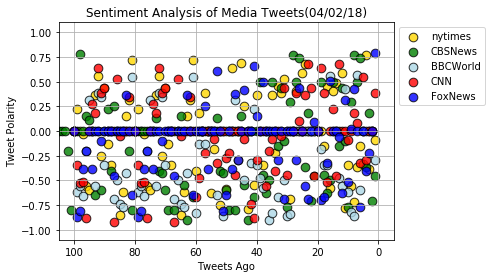

In [95]:
# plot the scatter plots
plt.scatter(np.arange(-len(tweet_data_df[tweet_data_df["source"] == "nytimes"]), 0, 1),
            tweet_data_df[tweet_data_df["source"] == "nytimes"]["compound"],
           edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
           alpha=0.8, label="nytimes")

plt.scatter(np.arange(-len(tweet_data_df[tweet_data_df["source"] == "CBSNews"]), 0, 1),
            tweet_data_df[tweet_data_df["source"] == "CBSNews"]["compound"],
           edgecolor="black", linewidths=1, marker="o", color="green", s=75,
           alpha=0.8, label="CBSNews")

plt.scatter(np.arange(-len(tweet_data_df[tweet_data_df["source"] == "BBCWorld"]), 0, 1),
            tweet_data_df[tweet_data_df["source"] == "BBCWorld"]["compound"],
           edgecolor="black", linewidths=1, marker="o", color="lightblue", s=75,
           alpha=0.8, label="BBCWorld")

plt.scatter(np.arange(-len(tweet_data_df[tweet_data_df["source"] == "CNN"]), 0, 1),
            tweet_data_df[tweet_data_df["source"] == "CNN"]["compound"],
           edgecolor="black", linewidths=1, marker="o", color="red", s=75,
           alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_data_df[tweet_data_df["source"] == "FoxNews"]), 0, 1),
            tweet_data_df[tweet_data_df["source"] == "FoxNews"]["compound"],
           edgecolor="black", linewidths=1, marker="o", color="blue", s=75,
           alpha=0.8, label="FoxNews")

plt.legend(['nytimes', 'CBSNews', 'BBCWorld', 'CNN', "FoxNews"], loc='best', frameon=True, bbox_to_anchor=(1,1))

plt.title("Sentiment Analysis of Media Tweets(04/02/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.xlim(-105,5)
plt.ylim(-1.1,1.1)
plt.grid(True)
plt.savefig("Sentiment_Scatter.png")



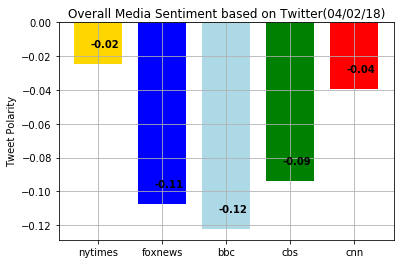

In [94]:

nytimes_score=tweet_data_df[tweet_data_df["source"] == "nytimes"]["compound"].mean()

foxnews_score=tweet_data_df[tweet_data_df["source"] == "FoxNews"]["compound"].mean()

bbc_score=tweet_data_df[tweet_data_df["source"] == "BBCWorld"]["compound"].mean()

cbs_score=tweet_data_df[tweet_data_df["source"] == "CBSNews"]["compound"].mean()

cnn_score=tweet_data_df[tweet_data_df["source"] == "CNN"]["compound"].mean()

fig, ax = plt.subplots()
polarity=(nytimes_score,foxnews_score,bcc_score,cbs_score,cnn_score)
ind = np.arange(len(polarity))  
width=0.75

nytimes=ax.bar(ind[0], polarity[0], width, color='gold')
foxnews=ax.bar(ind[1],polarity[1],width,color='blue')
bbc=ax.bar(ind[2], polarity[2], width, color='lightblue')
cbs=ax.bar(ind[3], polarity[3], width, color='green')
cnn=ax.bar(ind[4], polarity[4], width, color='red')

ax.set_ylabel('Tweet Polarity')
ax.set_title('Overall Media Sentiment based on Twitter(04/02/18)')
ax.set_xticks(ind)
ax.set_xticklabels(('nytimes', 'foxnews', 'bbc', 'cbs','cnn'))
ax.set_autoscaley_on(True)
ax.grid(True)
for i, v in enumerate(polarity):
    plt.text(i-.12,v+.01, f'{round(v, 2)}', color='black', fontweight='bold', fontsize=10)

plt.savefig("Sentiment_bar.png")